# Convolutional neural network for image classification

# Importing the libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
tf.__version__

'2.15.0'


# Loading the images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Convolutional Neural Network for Image Classification/homer_bart_2.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

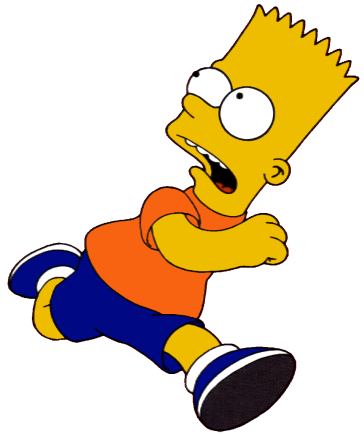

In [ ]:
tf.keras.preprocessing.image.load_img('/content/homer_bart_2/training_set/bart/bart100.bmp')

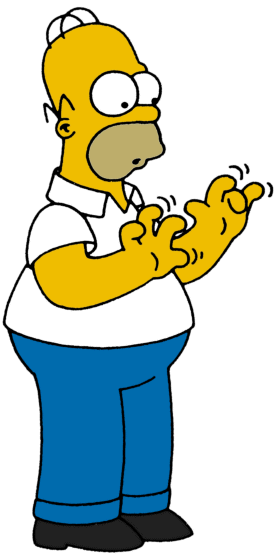

In [ ]:
tf.keras.preprocessing.image.load_img('/content/homer_bart_2/training_set/homer/homer100.bmp')

# Train and test set

In [ ]:
# We can configure some parameters to make modifications to the original images.
# This is very useful when we have few images of each class.
# As you can see here, there are many other parameters that can be configured.
# Using this function, in addition to the original images, we will also have new images
# with application of these pre-processing
training_generator = ImageDataGenerator(rescale=1./255, # normalizeing the data
                                        rotation_range=7, # number of rotation image can go
                                        horizontal_flip=True, # flipping the image horizontally
                                        zoom_range=0.2) # decrease or increase the zoom. needed for new image gen

# As the name suggests, this parameter will mix the images,
# they will be accessed in a completely random order to prevent the neural network
# from memorizing the order of the images. Otherwise, the neural network could
# learn the order of the images and not their features
train_dataset = training_generator.flow_from_directory('/content/homer_bart_2/training_set',
                                                        target_size = (64, 64), # required shape we want for our image
                                                        batch_size = 8, # images would be acceses in sets of 8
                                                        class_mode = 'categorical', # binary can be used but only one neuron in the output layer
                                                       shuffle = True) # helps prevent the NN from memorizing the image instead of learning the features.

Found 215 images belonging to 2 classes.


In [ ]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
train_dataset.class_indices

{'bart': 0, 'homer': 1}

In [ ]:
# To test, we set this parameter to FALSE because when testing,
# the order of the images makes no difference.
# If we leave the value equals TRUE, we will not be able to associate the
# predictions with the expected outputs
test_generator = ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory('/content/homer_bart_2/test_set',
                                                     target_size = (64, 64), # required shape we want for our image
                                                     batch_size = 1, # images would be acceses in sets of 1
                                                     class_mode = 'categorical', # binary can be used but only one neuron in the output layer
                                                     shuffle = False) # order of images has no difference, so we leave it as False

Found 54 images belonging to 2 classes.


# Building and training the neural network

In [ ]:
64 * 64 # total image pixel

4096

In [ ]:
(6272 + 2) / 2 # number of neurons for a hidden layer

3137.0

In [ ]:
# Conv2D represents any 2D image. 32 represents the number of feature detectors i.e filter
# 3,3 represents the feature extractor matrix size kernel size
# 64,64,3 represents the required size for our input image with 3 channels
# activation function applied to the generated feature maps from each feature detector
# MaxPooling2D is Pooling action with the required pool size, a 2x2 matrix

# PRE-PROCESSING LAYER WITH THREE CONVOLUTION LAYERS
CNN = Sequential()
CNN.add(Conv2D(32, (3,3), input_shape = (64,64,3), activation='relu'))
CNN.add(MaxPooling2D(pool_size=(2,2)))

CNN.add(Conv2D(32, (3,3), activation='relu'))
CNN.add(MaxPooling2D(pool_size=(2,2)))

CNN.add(Conv2D(32, (3,3), activation='relu'))
CNN.add(MaxPooling2D(pool_size=(2,2)))

# NEURAL NETWORK LAYER

CNN.add(Flatten()) # converts from matrix to vector and this is the input layer to the nural network

CNN.add(Dense(units = 3137, activation='relu')) # hidden layer 1
CNN.add(Dense(units = 3137, activation='relu')) # hidden layer 2
CNN.add(Dense(units = 2, activation='softmax')) # output uses two units of neuron to classify two classes of image. thus activation is softmax which returns 2 probabilities. if neuron units is 1 then activation would be sigmoid function to return only 1 probability

In [ ]:
14 * 14 * 32

6272

In [ ]:
CNN.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 6, 6, 32)         

In [ ]:
CNN.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = CNN.fit_generator(train_dataset, epochs=50, validation_data=test_dataset)

Epoch 1/50


<ipython-input-47-9072ef67271c>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = CNN.fit_generator(train_dataset, epochs=50, validation_data=test_dataset)


27/27 [==============================] - 10s 332ms/step - loss: 0.8733 - accuracy: 0.5767 - val_loss: 0.6535 - val_accuracy: 0.5185
Epoch 2/50
27/27 [==============================] - 7s 270ms/step - loss: 0.5896 - accuracy: 0.6837 - val_loss: 0.3755 - val_accuracy: 0.8519
Epoch 3/50
27/27 [==============================] - 9s 325ms/step - loss: 0.4612 - accuracy: 0.7628 - val_loss: 0.4458 - val_accuracy: 0.7593
Epoch 4/50
27/27 [==============================] - 9s 323ms/step - loss: 0.4686 - accuracy: 0.7767 - val_loss: 0.7446 - val_accuracy: 0.7222
Epoch 5/50
27/27 [==============================] - 7s 271ms/step - loss: 0.3929 - accuracy: 0.8233 - val_loss: 0.3504 - val_accuracy: 0.8704
Epoch 6/50
27/27 [==============================] - 7s 271ms/step - loss: 0.3428 - accuracy: 0.8465 - val_loss: 0.7277 - val_accuracy: 0.7593
Epoch 7/50
27/27 [==============================] - 9s 324ms/step - loss: 0.3425 - accuracy: 0.8465 - val_loss: 0.6773 - val_accuracy: 0.8333
Epoch 8/50
27/27

# Evaluating the neural network

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

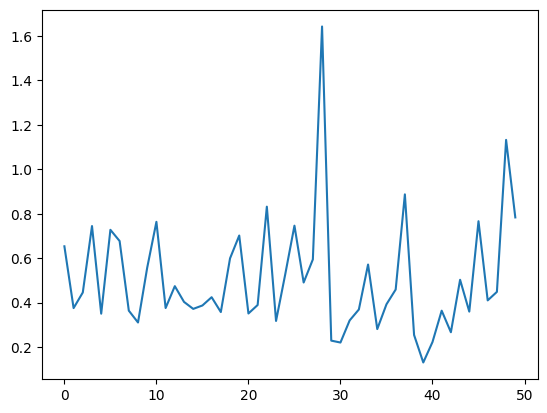

In [ ]:
plt.plot(history.history['val_loss']);

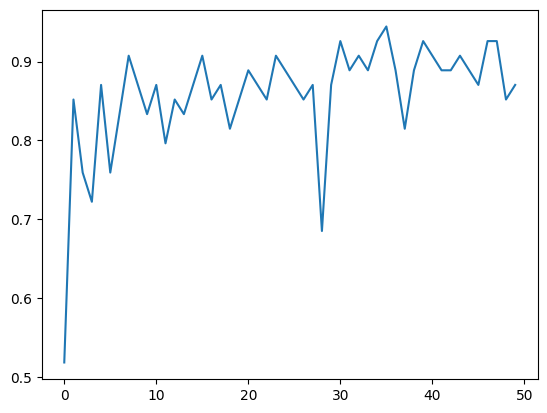

In [ ]:
plt.plot(history.history['val_accuracy']);

# Testing the Convolutional NN on test data set

In [ ]:
test_dataset.class_indices

{'bart': 0, 'homer': 1}

In [ ]:
predictions = CNN.predict(test_dataset)
predictions

54/54 [==============================] - 1s 19ms/step


array([[1.00000000e+00, 4.08277202e-23],
       [1.00000000e+00, 4.74123092e-16],
       [9.74278507e-08, 9.99999881e-01],
       [1.00000000e+00, 5.33998584e-25],
       [1.00000000e+00, 1.78255718e-22],
       [1.00000000e+00, 2.28543029e-28],
       [1.00000000e+00, 1.00573005e-09],
       [9.85104501e-01, 1.48955435e-02],
       [4.26575571e-05, 9.99957323e-01],
       [1.26359046e-01, 8.73640954e-01],
       [9.48540986e-01, 5.14590181e-02],
       [1.00000000e+00, 2.28345736e-16],
       [1.32318148e-02, 9.86768186e-01],
       [9.99991655e-01, 8.34195725e-06],
       [1.00000000e+00, 2.80508970e-14],
       [1.00000000e+00, 2.45264726e-21],
       [1.25203818e-01, 8.74796212e-01],
       [1.00000000e+00, 1.84409954e-09],
       [9.66930807e-01, 3.30692530e-02],
       [1.00000000e+00, 1.62172442e-30],
       [7.04877404e-03, 9.92951214e-01],
       [1.00000000e+00, 4.46538857e-24],
       [9.99998569e-01, 1.47904245e-06],
       [1.44810453e-01, 8.55189562e-01],
       [9.999876

In [ ]:
predictions = np.argmax(predictions, axis = 1)
predictions

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
test_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

# Evaluating the results from the Convolutional NN

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [ ]:
accuracy_score(test_dataset.classes, predictions)

0.8703703703703703

In [ ]:
test_dataset.class_indices

{'bart': 0, 'homer': 1}

<Axes: >

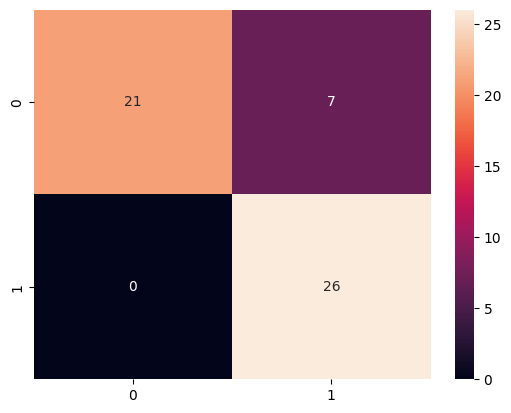

In [ ]:
cm = confusion_matrix(test_dataset.classes, predictions)
sns.heatmap(cm, annot=True)

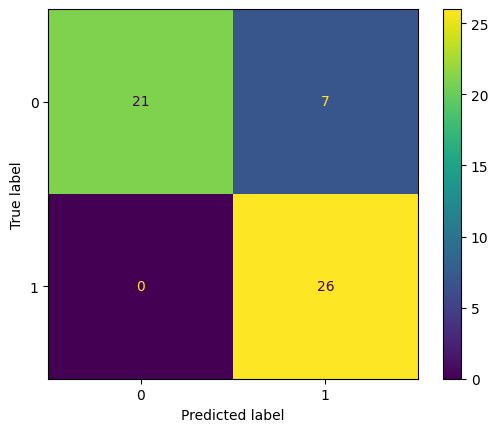

In [ ]:
ConfusionMatrixDisplay.from_predictions(test_dataset.classes, predictions)

In [ ]:
# The neural network can correctly identify 75% of the bart images and when it
# identifies these bart images, it is correct 68% of the time
# We can conclude that this neural network is better for classifying bart images, as
# we saw in the confusion matrix
print(classification_report(test_dataset.classes, predictions))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86        28
           1       0.79      1.00      0.88        26

    accuracy                           0.87        54
   macro avg       0.89      0.88      0.87        54
weighted avg       0.90      0.87      0.87        54



# Saving and loading the model

In [ ]:
model_json = CNN.to_json()
with open('network.json','w') as json_file:
  json_file.write(model_json)

In [ ]:
from keras.models import save_model
network_saved = save_model(CNN, '/content/weights.hdf5')

<ipython-input-65-84eb2e7a60bd>:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  network_saved = save_model(CNN, '/content/weights.hdf5')


In [ ]:
with open('network.json', 'r') as json_file:
  json_saved_model = json_file.read()
json_saved_model

'{"class_name": "Sequential", "config": {"name": "sequential_5", "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 64, 64, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_15_input"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Conv2D", "config": {"name": "conv2d_15", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 64, 64, 3], "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": nu

In [ ]:
CNN_loaded = tf.keras.models.model_from_json(json_saved_model)
CNN_loaded.load_weights('weights.hdf5')
CNN_loaded.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
CNN_loaded.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 6, 6, 32)         

# Classifying one single image

In [ ]:
img = cv2.imread('/content/homer_bart_2/test_set/homer/homer15.bmp')

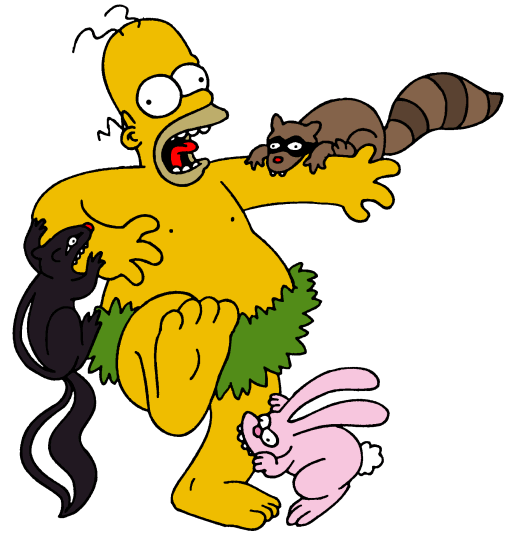

In [ ]:
cv2_imshow(img)

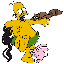

In [ ]:
img = cv2.resize(img, (64, 64))
cv2_imshow(img)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
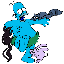

In [ ]:
img

In [ ]:
img = img / 255
img

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [ ]:
img.shape

(64, 64, 3)

In [ ]:
img = img.reshape(-1, 64, 64, 3)
img.shape

(1, 64, 64, 3)

In [ ]:
result = CNN_loaded(img)
result

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[3.0501303e-06, 9.9999690e-01]], dtype=float32)>

In [ ]:
result = np.argmax(result)
result

1

In [ ]:
test_dataset.class_indices

{'bart': 0, 'homer': 1}

In [ ]:
if result == 0:
  print('Bart')
else:
  print('Homer')

Homer
